In [51]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr

# En este documento se predecirán nuevas gráficas con valores de fracción volumen, radio y espesor de la partícula nuevos

Carga del modelo no normalizado

In [52]:
model = tf.keras.models.load_model('NO_normalizar_4.h5')

# Especificando los valores a usar

In [53]:
fracvol = 1
radio = 10
espesor = 75
longitud_de_onda = list(range(301, 901))

Creando diccionario

In [54]:
data = {
    "Longitud de onda": longitud_de_onda,
    "Fracvol": [fracvol] * len(longitud_de_onda),
    "Radio (nm)": [radio] * len(longitud_de_onda),
    "Espesor de la película (nm)": [espesor] * len(longitud_de_onda)
}

Creando DF

In [55]:
df = pd.DataFrame(data)
df

,Longitud de onda,Fracvol,Radio (nm),Espesor de la película (nm)
0,301,1,10,75
1,302,1,10,75
2,303,1,10,75
3,304,1,10,75
4,305,1,10,75
...,...,...,...,...
595,896,1,10,75
596,897,1,10,75
597,898,1,10,75
598,899,1,10,75


# Predicciones

In [56]:
valores = df.values

In [57]:
predictions = model.predict(valores)

19/19 [==============================] - 0s 1ms/step


In [58]:
df1 = pd.DataFrame(valores, columns = ['Longitud de onda', 'Fracvol', 'Radio (nm)', 'Espesor de la película (nm)'])
df2 = pd.DataFrame(predictions , columns = ['Índice de absorción'])

In [59]:
result_df = pd.concat([df1, df2], axis=1)
result_df

,Longitud de onda,Fracvol,Radio (nm),Espesor de la película (nm),Índice de absorción
0,301,1,10,75,0.000627
1,302,1,10,75,0.000635
2,303,1,10,75,0.000648
3,304,1,10,75,0.000662
4,305,1,10,75,0.000691
...,...,...,...,...,...
595,896,1,10,75,0.004687
596,897,1,10,75,0.004695
597,898,1,10,75,0.004702
598,899,1,10,75,0.004709


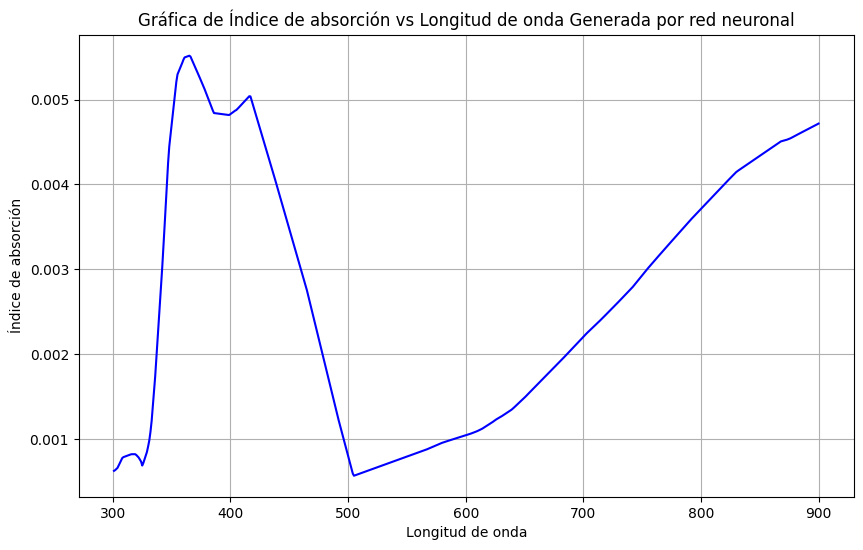

In [60]:
columnas_seleccionadas = ['Longitud de onda', 'Índice de absorción']
df_seleccionado = result_df[columnas_seleccionadas]

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.plot(df_seleccionado['Longitud de onda'], df_seleccionado['Índice de absorción'], color='blue')
plt.xlabel('Longitud de onda')
plt.ylabel('Índice de absorción')
plt.title('Gráfica de Índice de absorción vs Longitud de onda Generada por red neuronal')
plt.grid(True)
plt.show()